<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_lineplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

###라이브러리 로드하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

###그래프 스타일 및 선명한 폰트 설정

In [3]:
plt.style.use('ggplot')
set_matplotlib_formats('svg')

### [Line plot - 선 그래프(나무위키)](https://namu.wiki/w/%EC%84%A0%20%EA%B7%B8%EB%9E%98%ED%94%84)

- 수량을 점으로 표시하고 그 점을 선으로 이어 그린 그래프
- 시간에 따라 뭔가가 지속적으로 변화하는 것을 기록할 때 굉장히 유용
- 연속적 자료를 다루거나 통시적 자료를 다룰 경우 주로 사용

####lineplot 실습에 사용할 데이터
- flights

In [5]:
#데이터 로드하기
flights = sns.load_dataset('flights')
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [7]:
#passengers는 승객수를 나타내는데, 104~ 622명 평균은 280명, 중앙값은 265명 
flights.describe()

year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000

In [8]:
#year column은 1949년~1960년을 나타내고 있다.
flights['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [9]:
#month column은 1월 부터 12월
flights['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

###그래프 그리기

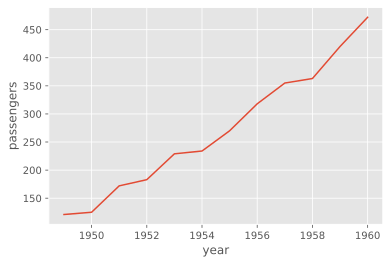

In [14]:
#flights[flights['month'] == 'May']
may_flights = flights.query("month == 'May'")
lineplot = sns.lineplot(data=may_flights, x='year',y='passengers')

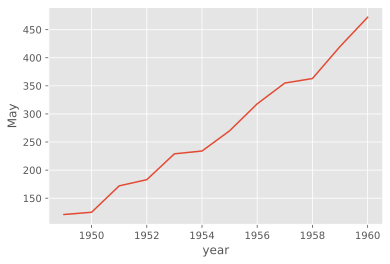

In [41]:
#flights_wide = flights.pivot_table(index='year',columns='month',values='passengers')

#pd.pivot을 사용하기
flights_wide = flights.pivot(index="year",columns = "month",values='passengers')

#위에서 지정하였던 pivot() 함수안에
#index값이 자동으로 x값, y값은 values로 지정
lineplot = sns.lineplot(data=flights_wide['May'])

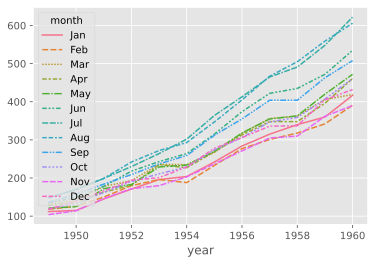

In [42]:
#data에서 column을 지정하지 않으면 자동으로 hue 값으로 적용

lineplot = sns.lineplot(data=flights_wide)